DS ESA11 Decision Tree (Polczynski)
----------------------------------

A) Find some data here [1] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

B) Check your tree against the tree derived from SciKit Learn as given in the Python example before! Print the tree with Graphviz (can be easily done with WebGraphViz [2])

* Manual calculation based on: http://www.saedsayad.com/decision_tree.htm
* Counts for tables determined with trifacta.

| Buys PC    |
|------------|
|Yes|No  | Total  |
| 12 | 8  | 20      |

| Buys PC - Age   |
|------------|
|   |       |Yes|No  | Total  |
|Age| <=30  | 2 | 6  | 8      |
|   | 31-40 | 6 | 0  | 6      |
|   | >40   | 4 | 2  | 6      |
|   |       |   |    | 20     |

| Buys PC - Income   |
|------------|
|      |       |Yes|No  | Total  |
|Income| High  | 3 | 2  |  5     |
|      | Medium| 5 | 3  |  8     |
|      | Low   | 4 | 3  |  7     |
|      |       |   |    | 20     |

| Buys PC - Credit Rating   |
|------------|
|            |            |Yes|No  | Total  |
|CreditRating| Excellent  | 5  | 5 | 10     |
|            | Fair       | 7  | 3 | 10     |
|            |            |    |   | 20     |

| Buys PC - Student   |
|------------|
|            |       |Yes|No  | Total  |
|Student     | Yes   | 8 | 1  |  9     |
|            | No    | 4 | 7  |  11    |
|            |       |   |    | 20     |

In [1]:
import math

# frequenczy one attribute
def entropy(a,b):
    esum = a+b
    a=a/esum
    b=b/esum
    b = (b if b== 0 else b*math.log2(b))
    a = (a if a== 0 else a*math.log2(a))
    return -(a)-(b)

# helper for two attribute (weighted)
def pe(total,a,b):
    return ((a+b)/total)*entropy(a,b)

# helper for gain
def gain(totalentropy, thisentropy):
    return totalentropy - thisentropy

In [2]:
# Manual calculations of entropy gain to calculate best first split A)
e_bpc = entropy(12,8)
print("entropy bpc", e_bpc)

# Age
                 # total, Yes, No
e_bpc_age = pe(20, 2, 6) + pe(20, 6, 0) + pe(20, 4, 2)
print("entropy bpc age", e_bpc_age)
g_age = gain(e_bpc, e_bpc_age)
print("entropy gain bpc age", g_age, "<-----------")

# Income
e_bpc_inc = pe(20, 3, 2) + pe(20, 5, 3) + pe(20, 4, 3)
print("entropy bpc inc", e_bpc_inc)
g_inc = gain(e_bpc, e_bpc_inc)
print("entropy gain bpc inc", g_inc)

# credit rating
e_bpc_cred = pe(20, 5, 5) + pe(20, 7, 3)
print("entropy bpc cred", e_bpc_cred)
g_cred = gain(e_bpc, e_bpc_cred)
print("entropy gain bpc cred", g_cred)

# student
e_bpc_stud = pe(20, 8, 1) + pe(20, 4, 7)
print("entropy bpc stud", e_bpc_stud)
g_stud = gain(e_bpc, e_bpc_stud)
print("entropy gain bpc stud", g_stud)

entropy bpc 0.9709505944546686
entropy bpc age 0.6
entropy gain bpc age 0.3709505944546686 <-----------
entropy bpc inc 0.9693410973956411
entropy gain bpc inc 0.0016094970590274649
entropy bpc cred 0.9406454496153464
entropy gain bpc cred 0.03030514483932223
entropy bpc stud 0.7465794181793928
entropy gain bpc stud 0.2243711762752758


__The highest information gain is the age, thus this is the first split.__

Please note that this is not directly comparable with B) as one hot encoding is in use there and thus different tables result. However in this case also in B) an Age feature is choosen as first split which indicates our manual results are correct.

In [3]:
import graphviz
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [4]:
df = pd.read_csv('ds_esa11_data.csv')

In [5]:
# perform one-hot encoding of all columns
dfc = pd.get_dummies( df ) 

# drop redundant boolean columns (redundant)
dfc = dfc.drop(columns=['student_Yes', 'creditrating_Excellent', 'buyspc_Yes'])

# output values for better understanding of one hot encoding
print(dfc)

dtv = dfc.values

    age_31...40  age_<=30  age_>40  income_High  income_Low  income_Medium  \
0             0         1        0            1           0              0   
1             0         1        0            1           0              0   
2             1         0        0            1           0              0   
3             0         0        1            0           0              1   
4             0         0        1            0           1              0   
5             0         0        1            0           1              0   
6             1         0        0            0           1              0   
7             0         1        0            0           0              1   
8             0         1        0            0           1              0   
9             0         0        1            0           0              1   
10            0         1        0            0           0              1   
11            1         0        0            0           0     

In [6]:
# perform decision tree classification
dt = DecisionTreeClassifier(max_depth=10, presort=True)
dt.fit(dtv[:, 0:8] , dtv[:, 8:9])

# print classes
print(dt.classes_)

# print features
print(dfc.columns.values.tolist())

[0 1]
['age_31...40', 'age_<=30', 'age_>40', 'income_High', 'income_Low', 'income_Medium', 'student_No', 'creditrating_Fair', 'buyspc_No']


In [7]:
# function to render out decision tree with graphviz
def renderdt(dt):
    # generate graph
    dot_data = export_graphviz(
            dt,
            out_file=None,
            feature_names=dfc.columns.values[0:8].tolist(),
            class_names=['Buy', 'Doesnt Buy'], # buyspc_No 0: Buy | 1: Doesn't Buy
            leaves_parallel=True,
            filled=True,
            rotate=True
    )

    # render using dot/graphviz
    return graphviz.Source(dot_data)

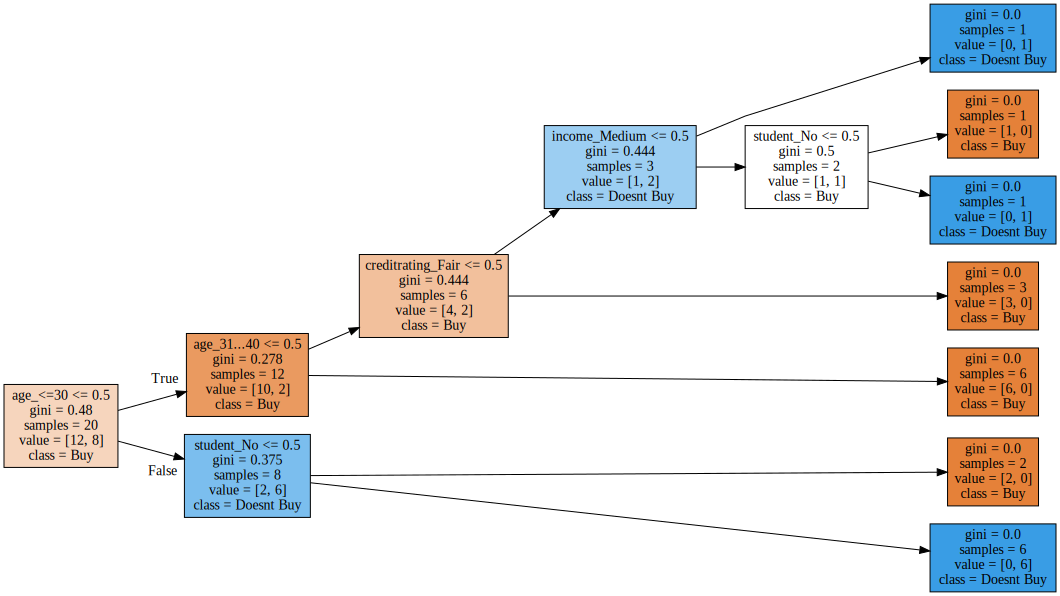

In [8]:
# decision tree maxdepth= 10
renderdt(dt)

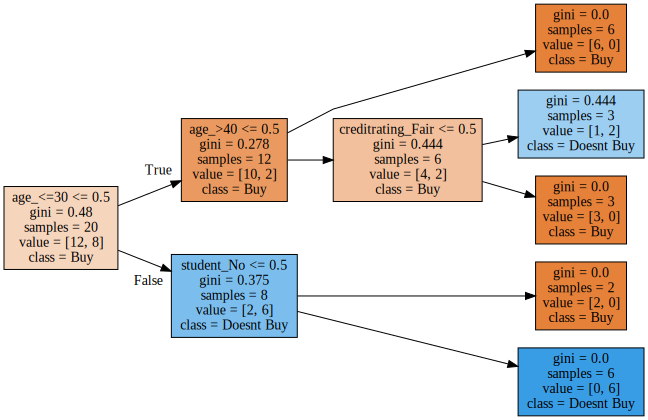

In [9]:
# decision tree maxdepth= 3 (10 probably overfit as some leaves result in 1 sample)
dt2 = DecisionTreeClassifier(max_depth=3, presort=True)
dt2.fit(dtv[:, 0:8] , dtv[:, 8:9])

renderdt(dt2)

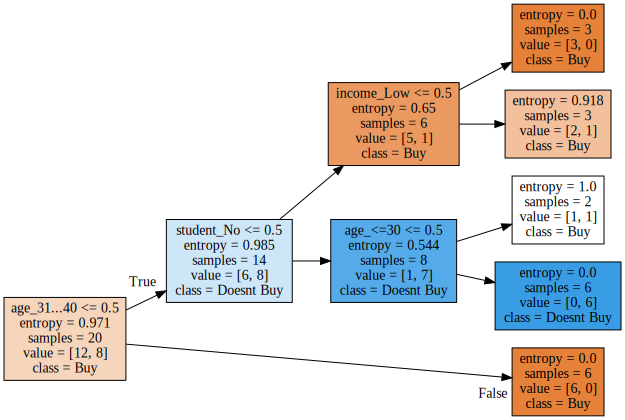

In [10]:
# decision tree maxdepth= 3 using information gain
dt2 = DecisionTreeClassifier(max_depth=3, criterion="entropy", presort=True)
dt2.fit(dtv[:, 0:8] , dtv[:, 8:9])

renderdt(dt2)